# Machine Learning Foundation - Project 3

# Investigate No-show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project analyzes the dataset that presents information from 100k medical appointments in Brazil and the status of whether or not patients show up for their appointment. The dataset contains about 14 columns corresponding to the characteristics of patients and about 110K records pertaining to each appointment made. Some of the variables of interest to this project are 

**‘ScheduledDay’** tells us on what day the patient set up their appointment. <br>
**‘Scholarship’** indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.<br>
**'Gender'** indicates Male or female patient <br>
**'Age'** corresponds to the age of the patient <br>
**'No-show'** indicates the status whether or not the patient turned up for the appointment<br>
**'SMS_received'** indicates if a reminder SMS was received by the patient for the appointment<br>

and there are columns like **Hypertension, Diabetes, Alcoholism, Handicap** that inidicate other disease conditions of the patients.<br>

This project intends to explore the relationship between various variables with respective to the No_Show status. However, this project is limited to understanding the distribution and correlation only, but not aimed at predicting whether a patient shall show up or not in future appoitnments. 

Some questions of interest are:

### Questions:

1. What percentage of patients did not show up on appointment day? How is this distribution for Males and Females?
2. Do Age, Scholarship and SMS reminders have an affect on no-show?
3. How does show vs no-show distribution vary for different disease conditions of the patients?



In [1]:
# Setting up import statements for all of the packages to be used.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from datetime import datetime # operations to parse dates


<a id='wrangling'></a>
## Data Wrangling

### Load and understand dataset

The No-show appointments dataset has **14 columns and 110527 rows**. Of the 14 columns, 9 are numeric type and the remaining 5 are of object type. The object type columns are Gender, Scheduled day, Appointment day, Neighborhood and No-Show.


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.

import os
path = os.getcwd()
#print(path)
noshow_df = pd.read_csv(path + '/noshowappointments.csv')
noshow_df.get_dtype_counts()
noshow_df.info() 
noshow_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No


### Data Cleansing

**Check for NULL Values in the dataset**

There are no NULL values or empty cells in any record - every appointment schedule has all 14 entities information.

**Check for consistency in column headers - formatting, spell check**

It is observed that the column names are inconsistently formatted and also spelling mistakes in some of column names. The followig changes have been mde to the column headers for consistency. 

AppointmentID to AppointmentId<br>
Hipertension to Hypertension               
Handcap to Handicap<br>
No-show to No_show<br>

In [3]:
# This section performs the data cleaning steps 

#Check for consistency in column headers - formatting, spell check

noshow_df.rename(columns={'AppointmentID':'AppointmentId',
                          'Hipertension':'Hypertension',                  
                          'Handcap':'Handicap',
                           'No-show':'No_show'}, inplace=True) 


#Check for any NULL values in the records
noshow_df.isnull().sum()
                                     
                                 


PatientId         0
AppointmentId     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No_show           0
dtype: int64

**Check for duplicate and unique values across columns**

There are NO duplicate rows, so we do not need to delete any redundant data

In [4]:
#Check for duplicates
noshow_df.duplicated().sum()

0

In [5]:
# List the unique values in columns of interest

print('\033[1m' + 'PatientId'+ '\033[0m','\nUnique values:', noshow_df['PatientId'].unique(), '\nNo of unique values:',len(noshow_df.PatientId.unique()))
print('\033[1m' + '\nAppointmentId'+ '\033[0m','\nUnique values:', noshow_df['AppointmentId'].unique(), '\nNo of unique values:',len(noshow_df.AppointmentId.unique()))
print('\033[1m' + '\nGender'+ '\033[0m','\nUnique values:', noshow_df['Gender'].unique(), '\nNo of unique values:',len(noshow_df.Gender.unique()))
print('\033[1m' + '\nScheduledDay'+ '\033[0m','\nUnique values:', noshow_df['ScheduledDay'].unique(), '\nNo of unique values:',len(noshow_df.ScheduledDay.unique()))
print('\033[1m' + '\nAppointmentDay'+ '\033[0m','\nUnique values:', noshow_df['AppointmentDay'].unique(), '\nNo of unique values:',len(noshow_df.AppointmentDay.unique()))
print('\033[1m' + '\nAge'+ '\033[0m','\nUnique values:', noshow_df['Age'].unique(), '\nNo of unique values:',len(noshow_df.Age.unique()))
print('\033[1m' + '\nScholarship'+ '\033[0m','\nUnique values:', noshow_df['Scholarship'].unique(), '\nNo of unique values:',len(noshow_df.Scholarship.unique()))
print('\033[1m' + '\nHypertension'+ '\033[0m','\nUnique values:', noshow_df['Hypertension'].unique(), '\nNo of unique values:',len(noshow_df.Hypertension.unique()))
print('\033[1m' + '\nDiabetes'+ '\033[0m','\nUnique values:', noshow_df['Diabetes'].unique(), '\nNo of unique values:',len(noshow_df.Diabetes.unique()))
print('\033[1m' + '\nAlcoholism'+ '\033[0m','\nUnique values:', noshow_df['Alcoholism'].unique(), '\nNo of unique values:',len(noshow_df.Alcoholism.unique()))
print('\033[1m' + '\nHandicap'+ '\033[0m','\nUnique values:', noshow_df['Handicap'].unique(), '\nNo of unique values:',len(noshow_df.Handicap.unique()))
print('\033[1m' + '\nSMS_received'+ '\033[0m','\nUnique values:', noshow_df['SMS_received'].unique(), '\nNo of unique values:',len(noshow_df.SMS_received.unique()))
print('\033[1m' + '\nNo_show'+ '\033[0m','\nUnique values:', noshow_df['No_show'].unique(), '\nNo of unique values:',len(noshow_df.No_show.unique()))


PatientId 
Unique values: [2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13] 
No of unique values: 62299

AppointmentId 
Unique values: [5642903 5642503 5642549 ... 5630692 5630323 5629448] 
No of unique values: 110527

Gender 
Unique values: ['F' 'M'] 
No of unique values: 2

ScheduledDay 
Unique values: ['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z'] 
No of unique values: 103549

AppointmentDay 
Unique values: ['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00

AppointmentId has 110527 values, this will be our primary key to perform analysis on the dataset

**Check for any outliers and remove them**

The Age column has outliers like -1, 102, 115. For analysis, considering age greater than or equal to 0 and less than or equal to 100. So, removing the outliers for to make inferences.

In [6]:
# Check for any outliers and remove them 

print("Age range: ", sorted(noshow_df['Age'].unique()))

# Consider age range 0 to 100. Remove others 
noshow_df = noshow_df[(noshow_df.Age >= 0) & (noshow_df.Age <= 100)]

print("\nAge range after removing outliers: ", sorted(noshow_df['Age'].unique()))


Age range:  [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]

Age range after removing outliers:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


The new number of records in the dataset after removing outliers is 


In [7]:
# New number of records in the dataset post deletion of outliers in the Age colummn
noshow_df.count()


PatientId         110519
AppointmentId     110519
Gender            110519
ScheduledDay      110519
AppointmentDay    110519
Age               110519
Neighbourhood     110519
Scholarship       110519
Hypertension      110519
Diabetes          110519
Alcoholism        110519
Handicap          110519
SMS_received      110519
No_show           110519
dtype: int64

** Check for datatype conversion wherever required**

The ScheduledDay and AppointmentDay have 0 in the time, so converting them to datetime objects for easy analysis. With this, we can calculate the difference in both to compute the delta. This could be a possible factor effecting no-show response.

Create a new column - Days_delta that records time difference between the scheduled day and appointment day.

In [8]:
# Converting ScheduledDay and AppointmentDay into datetime objects.
dt_appointmentDay =  pd.to_datetime(noshow_df.ScheduledDay).dt.date
dt_scheduledDay = pd.to_datetime(noshow_df.AppointmentDay).dt.date

# Computing delta (only days) and adding as a column to the dataset 
noshow_df['days_delta'] = (dt_scheduledDay - dt_appointmentDay).dt.days

print("\nDays delta unique values: ", sorted(noshow_df['days_delta'].unique()))

# Remvoe outliers from days delta range 
noshow_df = noshow_df[(noshow_df.days_delta >= 0)]

print("\nDays delta range after removing outliers: ", sorted(noshow_df['days_delta'].unique()))

noshow_df.head(10)
noshow_df.info()


Days delta unique values:  [-6, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 117, 119, 122, 123, 125, 126, 127, 132, 133, 139, 142, 146, 151, 155, 162, 169, 176, 179]

Days delta range after removing outliers:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 

In [9]:
# Convert "Gender' and "No-Show' object types to numeric data types
noshow_df['Gender'] = noshow_df['Gender'].map({'M':0, 'F':1})
noshow_df['No_show'] = noshow_df['No_show'].map({'No':0, 'Yes':1})
noshow_df.head()


PatientId  AppointmentId  Gender          ScheduledDay  \
0  2.987250e+13        5642903       1  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503       0  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549       1  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828       1  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494       1  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hypertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handicap  SMS_received  No_show  days_delta  
0         0           0         0             0        0           0  
1         0           0         0             0        0           0  
2         0           0         0             0        0           0  
3         0           0         0             0        0           0  
4         1           0         0             0        0           0

<a id='eda'></a>
## Exploratory Data Analysis

Having done the data cleanup, the data is now ready to be analyzed. We will look at each of the questions mentioned in the Introduction section. Before digging deeper into the questons stated, it is good to look at the correlation matrix to understand the big picture of corelation across variables. 

Presenting the correlation matrix below using Pearson method. <br>
If r (Pearson's correlation co-efficient) is positive there is a correlation between the two variables, however, how strongly they are correlated depends on the value of r. <br>
If r is negative => there is no co-relation

In [10]:
noshow_df.corr(method='pearson')

PatientId  AppointmentId    Gender       Age  Scholarship  \
PatientId       1.000000       0.004023 -0.007949 -0.004277    -0.002864   
AppointmentId   0.004023       1.000000 -0.018523 -0.019156     0.022625   
Gender         -0.007949      -0.018523  1.000000  0.106327     0.114315   
Age            -0.004277      -0.019156  0.106327  1.000000    -0.092432   
Scholarship    -0.002864       0.022625  0.114315 -0.092432     1.000000   
Hypertension   -0.006470       0.012754  0.055730  0.504802    -0.019741   
Diabetes        0.001620       0.022637  0.032569  0.292551    -0.024905   
Alcoholism      0.011022       0.032950 -0.106164  0.095879     0.035016   
Handicap       -0.007756       0.014084 -0.022961  0.077450    -0.008489   
SMS_received   -0.009762      -0.256628  0.046320  0.012708     0.001174   
No_show        -0.001432      -0.162606  0.004106 -0.060469     0.029180   
days_delta     -0.001431      -0.771840  0.028416  0.034839    -0.030438   

               Hypertension  Diabetes  Alcoholism  Handicap  SMS_received  \
PatientId         -0.006470  0.001620    0.011022 -0.007756     -0.009762   
AppointmentId      0.012754  0.022637    0.032950  0.014084     -0.256628   
Gender             0.055730  0.032569   -0.106164 -0.022961      0.046320   
Age                0.504802  0.292551    0.095879  0.077450      0.012708   
Scholarship       -0.019741 -0.024905    0.035016 -0.008489      0.001174   
Hypertension       1.000000  0.433091    0.087967  0.080328     -0.006331   
Diabetes           0.433091  1.000000    0.018468  0.057677     -0.014568   
Alcoholism         0.087967  0.018468    1.000000  0.004709     -0.026159   
Handicap           0.080328  0.057677    0.004709  1.000000     -0.023963   
SMS_received      -0.006331 -0.014568   -0.026159 -0.023963      1.000000   
No_show           -0.035636 -0.015149   -0.000175 -0.006596      0.126547   
days_delta        -0.017247 -0.027203   -0.038529 -0.019800      0.398136   

                No_show  days_delta  
PatientId     -0.001432   -0.001431  
AppointmentId -0.162606   -0.771840  
Gender         0.004106    0.028416  
Age           -0.060469    0.034839  
Scholarship    0.029180   -0.030438  
Hypertension  -0.035636   -0.017247  
Diabetes      -0.015149   -0.027203  
Alcoholism    -0.000175   -0.038529  
Handicap      -0.006596   -0.019800  
SMS_received   0.126547    0.398136  
No_show        1.000000    0.186312  
days_delta     0.186312    1.000000

Text(0.5,1,'Correlation matrix showing relationship between select variables\n')

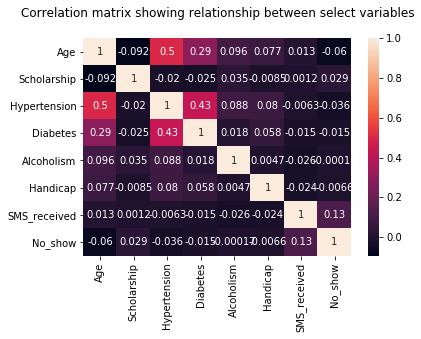

In [11]:
#Correlation matrix showing relationship between variables

noshow_corr_df = noshow_df[['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received','No_show']]
noshow_corr = noshow_corr_df.corr()

sns.heatmap(noshow_corr, 
        xticklabels=noshow_corr.columns,
        yticklabels=noshow_corr.columns, annot=True)

plt.title('Correlation matrix showing relationship between select variables\n')


From the above matrix, there seems to be some correlation between the age of the patients and Hypertension and Diabetes, however there seems to be no strong correlation between thet No-show status with other variables.

Engaging with the data further to answer the questions stated in the Introduction. 

### 1. What percentage of patients did not show up on appointment day? How is this distribution for Males and Females?


Below is the split of values in 'No-show': 0 = showed up and 1 = didn't show up: 

0    88203
1    22311
Name: No_show, dtype: int64

 Out of 110514 records, 22311 didn't show up, i.e. 20.19 %


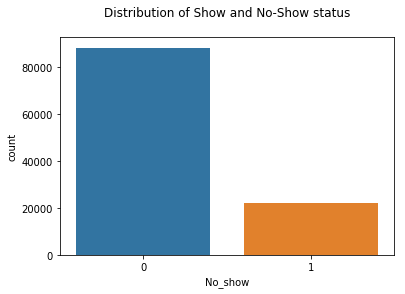

In [12]:
# Function to count the percentage of no-shows 
def no_show_percent():
  
    #counter to store the count of no-shows
    no_show = 0 
    for value in noshow_df['No_show']:
        if value == 1:
            no_show += 1
    print ("\n Out of", len(noshow_df['No_show']), "records,", no_show, "didn't show up, i.e.", round(float(no_show) / float(len(noshow_df['No_show'])), 4)*100,"%")

print ("Below is the split of values in 'No-show': 0 = showed up and 1 = didn't show up: \n")
print (noshow_df['No_show'].value_counts())
sns.countplot(x='No_show', data=noshow_df)
plt.title('Distribution of Show and No-Show status\n')

no_show_percent()

In [13]:
#Function to plot bar graph - to be reused for different variables 

def Show_No_Show_plot(df, bygroup):
    df_by_Group = pd.crosstab(df[bygroup], df.No_show, normalize = 'index')
    df_by_Group = np.round((df_by_Group * 100), decimals=2)
    ax = df_by_Group.plot.bar(figsize=(10,5));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:2.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(df_by_Group.index,rotation = 0, fontsize = 15);
    ax.set_title('\nPercentage distribution of Show vs No_Show (for ' + df_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(df_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('Percentage', fontsize = 12)
    rects = ax.patches
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)

    return df_by_Group



No_show      0      1
Gender               
0        80.04  19.96
1        79.69  20.31

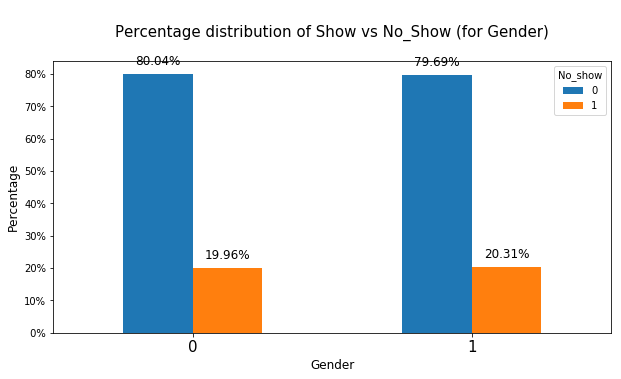

In [14]:
#Distributon of No-show percentage for Gender ( Male - 0, Female - 1)

Show_No_Show_plot(noshow_df, 'Gender')


**Findings** <br>
From the above analysis, it can be observed that only 20.19 % of the appointments were no show. Also, from the bar plot of Male Female No show distribution, there seems to be no significant difference in the No-show percentage for gender categrical data. 

### 2. Do Age, Scholarship and SMS reminders have an affect on no-show?

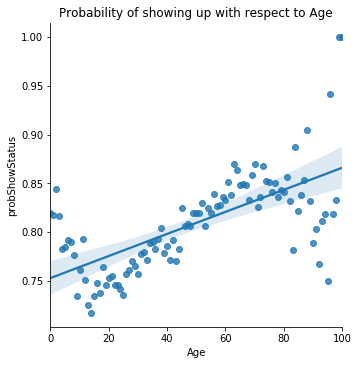

In [15]:
def  probability_showstatus(dataset, group_by):    
    df = pd.crosstab(index = dataset[group_by], columns = dataset['No_show']).reset_index()
    # 1- No_show => missed appointment 0 - Show =>Made appointment
    df['probShowStatus'] = df[0] / (df[1] + df[0])
    return df[[group_by, 'probShowStatus']]

sns.lmplot(data = probability_showstatus(noshow_df, 'Age'), x = 'Age', y = 'probShowStatus', fit_reg = True)
plt.xlim(0, 100)
plt.title('Probability of showing up with respect to Age')
plt.show()

**Findings**
From the above plot, it is clear that age has an affect on the show status. The no-show rate is relatively higher in teens, age groups 15-20. It is interesting to find that people in the age groups of 1-10 and above 45 years have high probability of turning up for the appointments.

In [16]:
# Create a funtion to calculate the plot of the group proportions based on one variable by number of appointments

def ProportionPiePlot(df, variable):
    df_pie = df[variable].value_counts()
    ax = df_pie.plot.pie(figsize=(6,6), autopct='%1.2f%%', fontsize = 12);
    ax.set_title('Overall '+ variable + ' (%)', fontsize = 15);
    return np.round(df_pie/df.shape[0]*100,2)

0    90.17
1     9.83
Name: Scholarship, dtype: float64

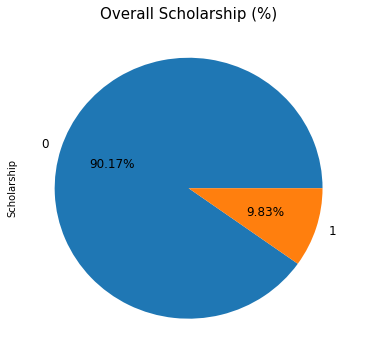

In [17]:
ProportionPiePlot(noshow_df, 'Scholarship')

No_show          0      1
Scholarship              
0            80.20  19.80
1            76.26  23.74

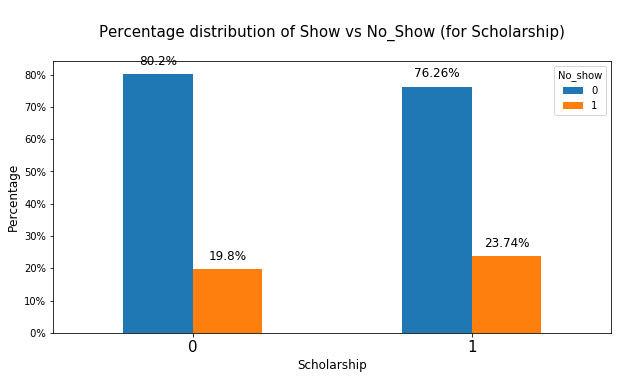

In [18]:
Show_No_Show_plot(noshow_df, 'Scholarship')

0    67.89
1    32.11
Name: SMS_received, dtype: float64

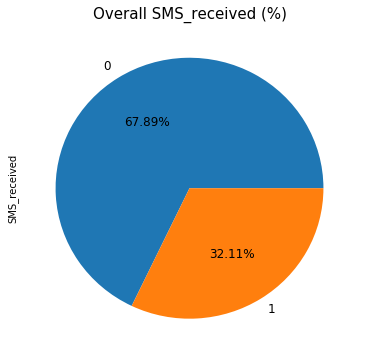

In [19]:
ProportionPiePlot(noshow_df, 'SMS_received')

No_show           0      1
SMS_received              
0             83.30  16.70
1             72.42  27.58

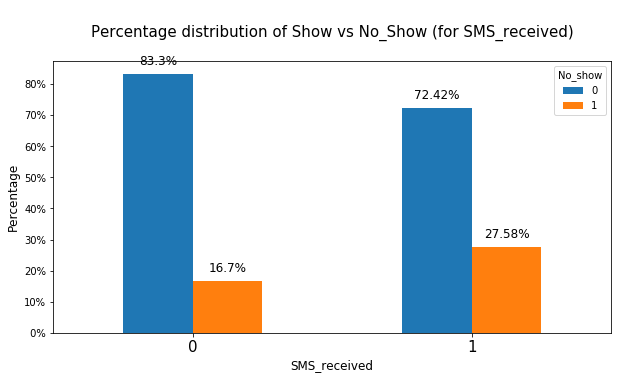

In [20]:
Show_No_Show_plot(noshow_df, 'SMS_received')

**Findings**

** For Scholarship**
The percentage of missed appointments for patients with no scholarship is slightly lower than that of the ones with scholarship, however, the correlation is not strong. 

** For SMS_received**
The show up percentage of patients who did not receive a SMS reminder is slightly higher than that of the patients who did not receive. This is surprising though. 

### 3. How does show vs no-show distribution vary for different disease conditions of the patients?


Before we explore the distribution of show status of patients with different disease conditions, let us look at the count of patients with each of disease condition. From the below plots, it can be observed that there are more patients with Hypertension than Alcoholism or Diabetes as age increases. 

Text(0.5,1,'Distribution of Patients with Hypertension across age groups')

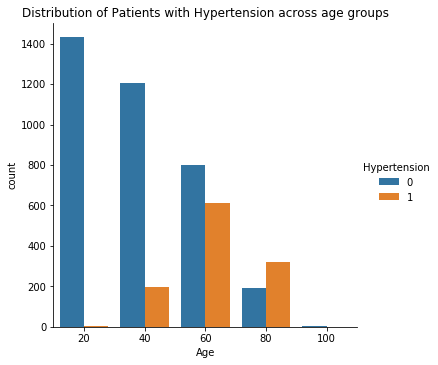

In [21]:
sns.catplot(x="Age", hue="Hypertension", order=[20,40,60,80,100], data=noshow_df, kind="count")
plt.title('Distribution of Patients with Hypertension across age groups')

Text(0.5,1,'Distribution of Patients with Diabetes across age groups')

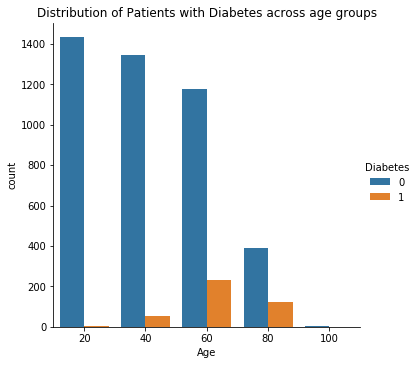

In [22]:
sns.catplot(x="Age", hue="Diabetes", order=[20,40,60, 80, 100], data=noshow_df, kind="count")
plt.title('Distribution of Patients with Diabetes across age groups')

Text(0.5,1,'Distribution of Patients with Alcoholism across age groups')

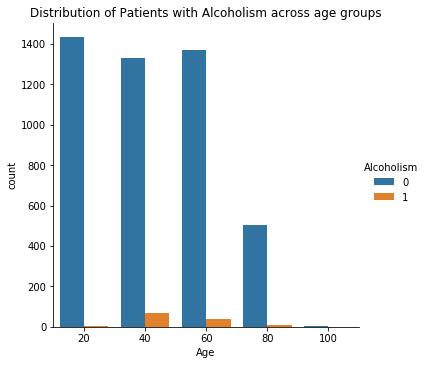

In [23]:
sns.catplot(x="Age", hue="Alcoholism", order=[20,40,60, 80, 100], data=noshow_df, kind="count")
plt.title('Distribution of Patients with Alcoholism across age groups')

We will now look at the distribution of no show status across patients with different disease conditions.

Hypertension
0    0.208975
1    0.173028
Name: No_show, dtype: float64
Diabetes
0    0.203576
1    0.180033
Name: No_show, dtype: float64
Alcoholism
0    0.201896
1    0.201488
Name: No_show, dtype: float64


Text(0.5,1,'Probability of Show/Noshow status for disease conditions of patients')

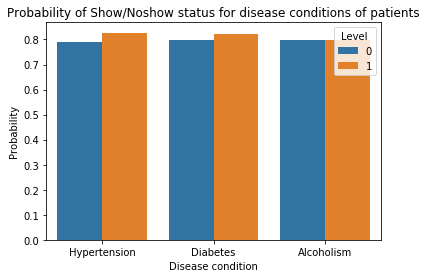

In [24]:
columns = ['Hypertension','Diabetes','Alcoholism']
for r in columns :
    print(noshow_df.groupby(r)['No_show'].mean())


def Show_No_Show_condition(df, group_by):
    rows = []
    for item in group_by:
        for level in df[item].unique():
            row = {'Disease condition': item}
            total = len(df[df[item] == level])
            n = len(np.array(df[(df[item] == level) & (df['No_show'] == 0)], dtype = bool))
            row.update({'Level': level, 'Probability': n / total})
            rows.append(row)
    return pd.DataFrame(rows)

sns.barplot(data = Show_No_Show_condition(noshow_df,['Hypertension', 'Diabetes', 'Alcoholism']),
            x = 'Disease condition', y = 'Probability', hue = 'Level')

plt.title('Probability of Show/Noshow status for disease conditions of patients')


**Findings**

As indicated in the correlation matrix, Age seem to be correlated with disease conditions like Hypertension and Diabetes, however, the disease condition is feebly related to No show status, especially in the case of Alcoholism. 

<a id='conclusions'></a>
## Conclusions


This dataset presents information about 110K medical appointments scheduled by patients in Brazil. The data is centered around the question of whether or not a patient would turn up for the scheduled appointment. 

This project is limited to understanding the nature of distribution of no show status across variables. It does not take into consideration recurring patients., however, the analysis has been done only for the unique appointment IDs. 

From the correlation matrix computed using Pearson method, it is clear that there is no strong correlation between the no show status and other categorical variables like Gender, SMS received, Scholarship or any of the disease condition, however, age seems to be somewhat correlated to the disease condition of the patients. 

Also, in the probability plot for Age vs show up status, it is evident that the no show rate was relatively higher in teens than in patients above 45 years. 

It was quite surprising to see the SMS reminders did not have any significant effect in increasing show up rate, on the contrary, the show up rate was low for patients who were sent reminders. 

### Limitations

Some of the below limitations, if were not present would have helped in making better analysis and prediction of the no show status:

1. Looking at the unique values in the Appointment days, it is clear that the 27 unique appointment days are ranged in the months of April, May and June, however, mostly only in May. 
2. There is no data on the time of the appointment, which I beleive could have an affect on the no-show status
3. Though the neighborhood was not considered as a part of the analysis for this project, I believe that the sample from the neighborhood was not representative of larger population to extend the findings.
4. SMS reminders had no effect in shooting up the show up rate - probably, data on acknowledgement to the message or confirmation would have helped in understanding the correlation better, if exists. 

